C:\Users\shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


data set loaded
forehead has been croped
features space as a pandas dataframe
only printing the final one with no.of components are 7
LBP+edge+Histogram+haar
[[21  1  0]
 [ 2 17  2]
 [ 0  2 18]]


Text(0,0.5,'Accuracy')

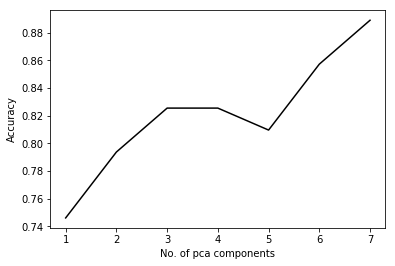

In [13]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import pywt
import pywt.data
import math
from scipy import stats
import numpy as np
import copy

train_dark = r'D:\combined_dark\*.jpg'
train_light = r'D:\lightnov27\*.jpg'
#train_light = r'D:\dec10light\*.jpg'
train_no = r'D:\clearnov27\*.jpg'
from scipy import ndimage, misc
import glob
train_d = []
train_l=[]
train_n=[]
for img in glob.glob(train_dark):
    image_resized = misc.imresize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB), (100, 75))
    train_d.append(image_resized)
for img in glob.glob(train_light):
    image_resized = misc.imresize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB), (100, 75))
    train_l.append(image_resized)
for img in glob.glob(train_no):
    image_resized = misc.imresize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB), (120, 85))
    train_n.append(image_resized[20:,10:])
print('data set loaded')    
def forehead():
	see=[]
#for i in range(0,8):
 #   see.append(object(pic[:30,:,:],forehead))
	forehead_train_d=[]
	for i in range(0,len(train_d)):
		exp=train_d[i]
		l_size,r_size,rgb= exp.shape
		l_size=int(r_size*.25)
		r_size=int(r_size*.75)
    
		pic=exp[:30,l_size:r_size,:]
		pic_h,pic_b,rgb=pic.shape
		for j in range(0,pic_h):
			for k in range(0,pic_b):
				for l in range(0,3):
					if pic[j][k][l]<20:
						pic[j][k][l]=0
					elif pic[j][k][l]>250:
						pic[j][k][l]=255
		forehead_train_d.append(pic)
                #plt.imshow(pic)
	forehead_train_l=[]
	for i in range(0,len(train_l)):
		exp=train_l[i]
		l_size,r_size,rgb= exp.shape
		l_size=int(r_size*.25)
		r_size=int(r_size*.75)
		pic=exp[:30,l_size:r_size,:]
		pic_h,pic_b,rgb=pic.shape
		for j in range(0,pic_h):
			for k in range(0,pic_b):
				for l in range(0,3):
					if pic[j][k][l]<20:
						pic[j][k][l]=0
					elif pic[j][k][l]>250:
						pic[j][k][l]=255
		forehead_train_l.append(pic)    
	forehead_train_n=[]
	for i in range(0,len(train_n)):
		exp=train_n[i]
		l_size,r_size,rgb= exp.shape
		l_size=int(r_size*.25)
		r_size=int(r_size*.75)
    
		pic=exp[:30,l_size:r_size,:]
		pic_h,pic_b,rgb=pic.shape
		for j in range(0,pic_h):
			for k in range(0,pic_b):
				for l in range(0,3):
					if pic[j][k][l]<20:
						pic[j][k][l]=0
					elif pic[j][k][l]>250:
						pic[j][k][l]=255
		forehead_train_n.append(pic)    

	return (forehead_train_n,forehead_train_d,forehead_train_l)

def statistics(image):


    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(gray)).flatten()
    feature=list(feature)
    a=stats.describe(gray.ravel())
    mean,var,skw,kurto=a[2:]
    std=np.sqrt(var)
    feature.append(mean)
    feature.append(std)
    feature.append(skw)
    feature.append(kurto)
    feature=list(feature)
    return feature


def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0], None, [256], [0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return list(hist.flatten())
#........................................................haar, DB2, DB4, DB6...............................#		  
def haar(image):
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    coeffs2 = pywt.dwt2(gray, 'haar')
    LL, (LH, HL, HH) = coeffs2
    square=copy.deepcopy(LL)
    for i in range(0,LL.shape[0]):
        for j in range(0,LL.shape[1]):
            #detail[i][j]=int(detail[i][j]*1/9)
            square[i][j]= int(math.sqrt((HH[i][j]*HH[i][j] + HL[i][j]*HL[i][j] + LH[i][j]*LH[i][j])))
            LL[i][j]=square[i][j]+LL[i][j]
            
            if square[i][j]<0:
                square[i][j]=0 
        
            elif square[i][j]>255:
                square[i][j]=255
    square=np.asarray(square, dtype=int)
    haralick = mahotas.features.haralick(square).mean(axis=0)
    LL=np.asarray(LL, dtype=int)
    #hist = cv2.calcHist([LL],[0],None,[256],[0,256])
    hist=[]
    haralick=list(haralick)
    stat=list(statistics(image))
    for i in haralick:
        hist.append(i)
    stat=list(statistics(image))
    for i in stat:
        hist.append(i)
      
    return (hist)
#...............return histogram of ll+sqrt(LH+HL+HH) and haralick of that...........#
#....................................................sobel, laplacian, canny edge........................................................#
def edge(image):
    GRAY= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    power=10*np.power(GRAY,.5) + 55
    for i in range(0,GRAY.shape[0]):
        for j in range(0,GRAY.shape[1]):
        #new[i][j]= 1.2*new[i][j]
        #if new[i][j]>255:
         #   new[i][j]=255
            power[i][j]=int(power[i][j])
            if power[i][j]>255:
                power[i][j]=255
    blur = cv2.blur(power,(5,5))
    detail=power-blur
    for i in range(0,detail.shape[0]):
        for j in range(0,detail.shape[1]):
        #detail[i][j]=int(detail[i][j]*1/9)
            if detail[i][j]<0:
                detail[i][j]=0
#plt.imshow(detail*2 ,cmap='gray')
    img=copy.deepcopy(power)


#detail_gray=cv2.cvtColor(detail,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(img, (7,7), 0)

    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)

    sobelx = np.uint8(np.absolute(sobelx))
    sobely = np.uint8(np.absolute(sobely))


    lap = cv2.Laplacian(img, cv2.CV_64F)
    lap = np.uint8(np.absolute(lap))

#laplacian = cv2.Laplacian(img,cv2.CV_64F)
#laplacian= np.unit8(np.absolute(laplacian))
#sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=7)

#sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=7)
    img1=copy.deepcopy(GRAY)
    cannyedges = cv2.Canny(img1,100,200)
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img, -1, kernelx)
    img_prewitty = cv2.filter2D(img, -1, kernely)

    for i in range(0,img_prewitty.shape[0]):
        for j in range(0,img_prewitty.shape[1]):
            img_prewitty[i][j]=int(img_prewitty[i][j])
            if img_prewitty[i][j]<0:
                img_prewitty[i][j]=0
            elif img_prewitty[i][j]> 255:
                img_prewitty[i][j]=255
    for i in range(0,img_prewitty.shape[0]):
        for j in range(0,img_prewitty.shape[1]):
            img_prewittx[i][j]=int(img_prewittx[i][j])
            if img_prewittx[i][j]<0:
                img_prewittx[i][j]=0
            elif img_prewittx[i][j]> 255:
                img_prewittx[i][j]=255      

#img_prewitt = cv2.bitwise_or(img_prewittx, img_prewitty)
    img_exp=.5*lap+.1*cannyedges

    for i in range(0,img_prewitty.shape[0]):
        for j in range(0,img_prewitty.shape[1]):
            img_exp[i][j]=int(img_exp[i][j])
            if img_exp[i][j]<0:
                img_exp[i][j]=0
            elif img_exp[i][j]> 255:
                img_exp[i][j]=255
    square=img_exp+img
    square=np.asarray(square, dtype=int)
    haralick = mahotas.features.haralick(square).mean(axis=0)
    hist=[]
    haralick=list(haralick)
    for i in haralick:
        hist.append(i)
    stat=list(statistics(image))
    for i in stat:
        hist.append(i)
    return (hist)

#...............................................................LBP and Haralick......................................#
import mahotas


# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

from skimage.feature import local_binary_pattern
#img1=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# settings for LBP
radius = 1
n_points = 4 * radius
METHOD = 'uniform'


def lbp(image):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    power=10*np.power(gray,.5) + 55
    for i in range(0,gray.shape[0]):
        for j in range(0,gray.shape[1]):
            if power[i][j]>255:
                power[i][j]=255
            if power[i][j]<0:
                power[i][j]=0
    blur = cv2.blur(power,(5,5))  
    detail=2*power-blur
    lbp = local_binary_pattern(power, n_points, radius, METHOD)
    img = lbp.astype('uint8')
    from skimage.feature import multiblock_lbp
    lbp_code = multiblock_lbp(power, 0, 0, 3, 3)
    #lbp_code=lbp_code.astype('uint8')
    #hist = cv2.calcHist([lbp_code],[0],None,[256],[0,256])

    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    feature=list(hist.ravel())
    #hist=[]
    #stat=list(statistics(lbp))
    #hist.append(stat)
    #feature = cv2.HuMoments(cv2.moments(lbp)).flatten()
    feature=list(feature)
    a=stats.describe(lbp.ravel())
    mean,var,skw,kurto=a[2:]
    std=np.sqrt(var)
    feature.append(mean)
    feature.append(std)
    feature.append(skw)
    feature.append(kurto)
    #feature.append(hist)
    feature=list(feature)
    return feature

def featureset(image):
	
	feature_lbp=lbp(image)
	feature_edge= edge(image)
	feature_haar=haar(image)
	feature=[]
	for f in range(0,len(feature_lbp)):
		feature.append(feature_lbp[f])

	for f in range(0,len(feature_edge)):
		feature.append(feature_edge[f])
	for f in range(0,len(feature_haar)):
		feature.append(feature_haar[f])
	hist =fd_histogram(image)
	for f in hist:
		feature.append(f)

	return feature

def main():
	All_feature=[]
	forehead_train_n,forehead_train_d,forehead_train_l=forehead()
	print('forehead has been croped')
	for img in forehead_train_n:
		f=featureset(img)
        
		f.append(0)
		#f=np.asarray(f)
		All_feature.append(f)
	for img in forehead_train_l:
		f=featureset(img)

		f.append(1)
		#f=np.asarray(f)
		All_feature.append(f)
	for img in forehead_train_d:
		f=featureset(img)

		f.append(2)
		#f=np.asarray(f)
		All_feature.append(f)

	return( All_feature)
AL=main()
length=len(AL[0])
ALL=np.asarray(AL)
ALL=ALL.T
f=[]
for i in range(0,length):
    f.append('f'+str(i))
import pandas as pd
df=pd.DataFrame()
print('features space as a pandas dataframe' )
for i in range(0,length):
    df[f[i]] = ALL[i]
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
a=[]
test=[]
train=[]
X_train, X_test, y_train, y_test = train_test_split(df.values[:,:length-1], df.values[:,length-1],test_size=0.3, random_state=12)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
   
for i in range(1,8):
    pca = decomposition.PCA(n_components=i)
    
    svc = SVC(kernel='linear')
    model = make_pipeline(pca, svc)
    
    model.fit(X_train,y_train) 
   
    pred = model.predict(X_test)
    con_mat=confusion_matrix(y_test, pred)
    a.append(i)
    train.append(model.score(X_train, y_train))
    test.append(model.score(X_test, y_test))
print('only printing the final one with no.of components are 7')
print('LBP+edge+Histogram+haar')
print(con_mat)
plt.plot(a,test,'k-')
plt.xlabel('No. of pca components')
plt.ylabel('Accuracy')
    